In [34]:
import numpy as np
import pandas as pd
import networkx as nx

In [26]:
def buildTree(file, cell_types_per_level, sheet_name, sheet_names, depth, current_depth):
    if current_depth > depth:
        return
    sheet = pd.read_excel(file, sheet_name=sheet_name)
    cell_types = sheet.columns[1:]
    for i in cell_types:
        if i in sheet_names:
            if current_depth in cell_types_per_level:
                cell_types_per_level[current_depth].append(i)
            else:
                cell_types_per_level[current_depth] = [i]
            buildTree(file, cell_types_per_level, i, sheet_names, depth, current_depth+1)

In [25]:
def buildTree_from_file(file, depth):
    cell_types_per_level = {}
    xl = pd.ExcelFile(file)
    sheet_names = xl.sheet_names
    cell_types_per_level[0] = sheet_names[0]
    buildTree(file, cell_types_per_level, sheet_names[0], sheet_names, depth, 1)
    return cell_types_per_level

In [29]:
file = '/Users/farateod/Documents/GitHub/tribus/tests/sample2/cell_type_calling/cell_type_descriptions.xlsx'
cell_types_per_level = {}
cell_types_per_level = buildTree_from_file(file, 3)

In [49]:
def buildTree1(file, graph, sheet_name, sheet_names, depth, current_depth):
    if current_depth > depth:
        return
    sheet = pd.read_excel(file, sheet_name=sheet_name)
    cell_types = sheet.columns[1:]
    for i in cell_types:
        if i in sheet_names:
            graph.add_edge(sheet_name, i)
            buildTree1(file, graph, i, sheet_names, depth, current_depth+1)

In [50]:
def buildTree_from_file1(file, depth):
    graph = nx.DiGraph()
    xl = pd.ExcelFile(file)
    sheet_names = xl.sheet_names
    graph.add_node(sheet_names[0])
    buildTree1(file, graph, sheet_names[0], sheet_names, depth, 1)
    return graph

In [51]:
file = '/Users/farateod/Documents/GitHub/tribus/tests/sample2/cell_type_calling/cell_type_descriptions.xlsx'
graph = buildTree_from_file1(file, 3)

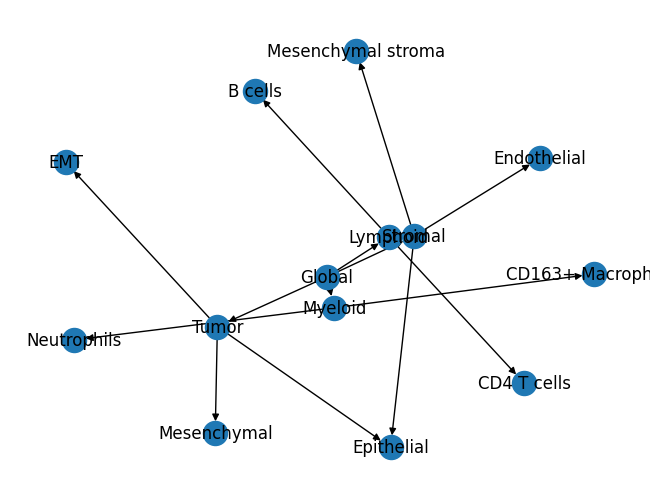

In [53]:
nx.draw(graph, with_labels = True)